# Assignment 1: Sampling
The objective of this assignment is to build up your intuitions about sampling from a population (e.g., for taking surveys).

In [219]:
# Load the Milan data.
data <- read.csv("/data/Assignment-1/Milan.csv")
# Print out the first few rows of the data.
head(data)

hhid,foodexp,hhsize,income,edhead,agehead,foodexpcat,kidlt6,kid618,incomecat,ageheadcat
402,37.0,3,24000,4,45,3,1,1,3,4
343,87.0,5,42000,3,33,6,2,1,4,2
316,18.0,3,7500,3,27,2,2,1,1,2
82,40.0,3,18000,1,41,3,1,1,3,3
325,27.0,3,10500,3,25,2,2,1,2,2
167,37.5,3,24000,2,29,3,2,1,3,2


## True mean weekly food expenditure for the population

**Task 1:** Compute the mean weekly food expenditure for the entire population of 500 people.

In [135]:
true.mean.foodexp <- mean(data$foodexp)
true.mean.foodexp

[1] 43.3004

## Single samples to estimate weekly food expenditure

**Task 2:** Sample 25 families without replacement and compute the mean weekly food expenditure for that sample of families.

In [180]:
set.seed(123)
sample.mean.25families <- mean(data[sample(nrow(data), 25), ]$foodexp)
sample.mean.25families

[1] 41.68

**Task 3:** Sample 100 families without replacement and compute the mean weekly food expenditure for that sample of families.

In [181]:
set.seed(123)
sample.mean.100families <- mean(data[sample(nrow(data), 100), ]$foodexp)
sample.mean.100families

[1] 42.105

**Task 4:** Compute a stratified random sample with n=100, stratified on `kid618`. This means you will get a sample of 100 families where 50 families have kids ages 6-18 and 50 families do not; the stratum-specific means are then combined based on the number of families in each stratum. Note that there are multiple different ways to code this up! Do what works best for you.

In [138]:
library(splitstackshape)

In [182]:
set.seed(123)
sample.mean.stratified <- mean(stratified(data, "kid618", size=100)$foodexp)
sample.mean.stratified

[1] 44.0475

**Understanding Checkpoint:** Compute the absolute value of the difference between the sample mean and the true mean (or the error) for each of the two samples.  Which one is smallest for these samples?  Does that make sense to you?  Try getting different samples (i.e., re-run the code for task 2, 3, and 4) and see if things change.  Which one of these values is *usually* smallest if you re-take the samples over and over? This is just to further your understanding.

In [183]:
abs(sample.mean.25families - true.mean.foodexp)
abs(sample.mean.100families - true.mean.foodexp)
abs(sample.mean.stratified - true.mean.foodexp)

[1] 1.6204

[1] 1.1954

[1] 0.7471

In [ ]:
#Usually,stratified value is the smallest.

## Repeated samples
For each of the three sampling strategies we've used (task 2, 3 & 4), you'll repeat the samples M=1000 times (i.e., "retake the survey") and plot the results.  You'll  also compute the population standard deviation and the sample standard deviation to include in your assignment write-up.  I've defined two functions to help you with these tasks.

In [92]:
# Load the ggplot2 library for figures.
library(ggplot2)

# Define the number of times to repeat a sample.
M <- 1000

# This function helps compute the two standard deviations of interest.
pop.and.sample.sd <- function(sampled.means) {
    # Compute the population standard deviation of the estimated means from
    # the true population mean.  You'll need to include this number in your
    # write-up.
    population.standard.deviation <- sqrt(sum((sampled.means$sample.mean - 
                                                 true.mean.foodexp)**2) / M)

    # Compute the sample standard deviation of the estimated means from
    # their average. You'll need to include this number in your write-up. 
    sample.standard.deviation <-
      sqrt(sum((sampled.means$sample.mean - 
                  mean(sampled.means$sample.mean))**2) / 
             (nrow(sampled.means) - 1))

    # Return the two standard deviations.
    return(c(population.standard.deviation, sample.standard.deviation))
}

# This function generates the plots you will need for your write-up.
# It may produce warnings about removing rows; this is alright.
plot.sample <- function(sampled.means, title, filename) {
    # Plot the distribution of sampled means along with the true population
    # mean as a red solid line and the empirical mean as a dashed line.
    p <- ggplot(sampled.means, aes(x=sample.mean)) + 
      geom_histogram(binwidth = 1) +
      xlim(20, 70) + xlab("mean weekly food expenditure") + 
      ggtitle(title) +
      geom_vline(xintercept = true.mean.foodexp, color="red") +
      geom_vline(xintercept = mean(sampled.means$sample.mean), 
                 linetype="dashed") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5))

    # Save the resulting image.   Include this plot in your write-up.
    ggsave(filename, width=7, height=3)
    
    return(p)
}

### Small sample size
**Task 5:** Sample n=25 families and compute the mean weekly food expenditure.  Repeat this M=1000 times. You will probably want to use some of your code from task 2.

In [162]:
sampled.means <- data.frame()
M <- 1000
set.seed(123)
for (i in seq(M)) {
  # Draw a sample of families and compute mean food expenditure for 
  # that sample.
  sample.mean <- mean(data[sample(nrow(data), 25), ]$foodexp)
  
  # Add the sample mean to the data frame of all sample means.
  sampled.means <- rbind(sampled.means, 
                         data.frame(sample=i, sample.mean=sample.mean))
}

# This function helps compute the two standard deviations of interest.
pop.and.sample.sd <- function(sampled.means) {
    # Compute the population standard deviation of the estimated means from
    # the true population mean.  You'll need to include this number in your
    # write-up.
    population.standard.deviation <- sqrt(sum((sampled.means$sample.mean - 
                                                 true.mean.foodexp)**2) / M)

    # Compute the sample standard deviation of the estimated means from
    # their average. You'll need to include this number in your write-up. 
    sample.standard.deviation <-
      sqrt(sum((sampled.means$sample.mean - 
                  mean(sampled.means$sample.mean))**2) / 
             (nrow(sampled.means) - 1))

    # Return the two standard deviations.
    return(c(population.standard.deviation, sample.standard.deviation))
}


In [163]:
# Print the two standard deviations (population s.d. and sample s.d.) to the console.
pop.and.sample.sd(sampled.means)

[1] 4.243528 4.243672

In [160]:
# Plot the distribution of samples.
plot.sample <- function(sampled.means, title, filename) {
    # Plot the distribution of sampled means along with the true population
    # mean as a red solid line and the empirical mean as a dashed line.
    p <- ggplot(sampled.means, aes(x=sample.mean)) + 
      geom_histogram(binwidth = 1) +
      xlim(20, 70) + xlab("mean weekly food expenditure for small sample") + 
      ggtitle(title) +
      geom_vline(xintercept = true.mean.foodexp, color="red") +
      geom_vline(xintercept = mean(sampled.means$sample.mean), 
                 linetype="dashed") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5))

    # Save the resulting image.   Include this plot in your write-up.
    ggsave('smallsample.jpg', width=7, height=3)
    
    return(p)
}

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

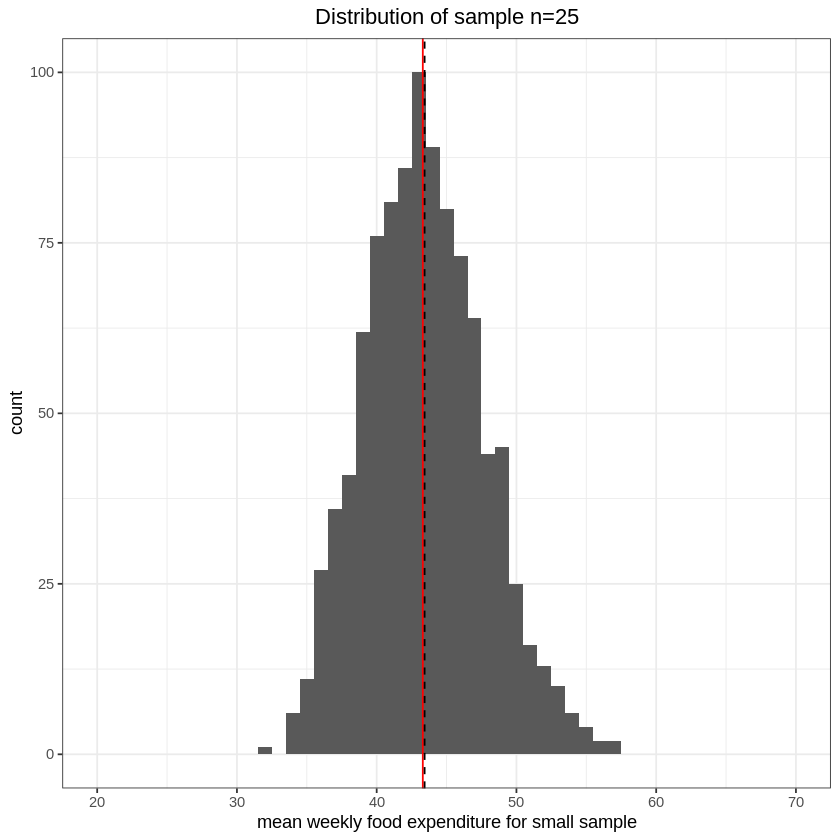

In [164]:
plot.sample(sampled.means,'Distribution of sample size n=25','smallsample')

### Larger sample size
**Task 6:** Sample n=100 families and compute the mean weekly food expenditure.  Repeat this M=1000 times. You will probably want to use some of your code from task 3.

In [166]:
sampled.means <- data.frame()
set.seed(333)
for (i in seq(M)) {
  # Draw a sample of families and compute mean food expenditure for 
  # that sample.
  sample.mean <- mean(data[sample(nrow(data), 100), ]$foodexp)
  
  # Add the sample mean to the data frame of all sample means.
  sampled.means <- rbind(sampled.means, 
                         data.frame(sample=i, sample.mean=sample.mean))
}
# This function helps compute the two standard deviations of interest.
pop.and.sample.sd <- function(sampled.means) {
    # Compute the population standard deviation of the estimated means from
    # the true population mean.  You'll need to include this number in your
    # write-up.
    population.standard.deviation <- sqrt(sum((sampled.means$sample.mean - 
                                                 true.mean.foodexp)**2) / M)

    # Compute the sample standard deviation of the estimated means from
    # their average. You'll need to include this number in your write-up. 
    sample.standard.deviation <-
      sqrt(sum((sampled.means$sample.mean - 
                  mean(sampled.means$sample.mean))**2) / 
             (nrow(sampled.means) - 1))

    # Return the two standard deviations.
    return(c(population.standard.deviation, sample.standard.deviation))
}

In [167]:
# Print the two standard deviations (population s.d. and sample s.d.) to the console.
pop.and.sample.sd(sampled.means)

[1] 1.853244 1.854120

In [168]:
# Plot the distribution of samples.
plot.sample <- function(sampled.means, title, filename) {
    # Plot the distribution of sampled means along with the true population
    # mean as a red solid line and the empirical mean as a dashed line.
    p <- ggplot(sampled.means, aes(x=sample.mean)) + 
      geom_histogram(binwidth = 1) +
      xlim(20, 70) + xlab("mean weekly food expenditure for larger sample") + 
      ggtitle(title) +
      geom_vline(xintercept = true.mean.foodexp, color="red") +
      geom_vline(xintercept = mean(sampled.means$sample.mean), 
                 linetype="dashed") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5))

    # Save the resulting image.   Include this plot in your write-up.
    ggsave('largersample.jpg', width=7, height=3)
    
    return(p)
}

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

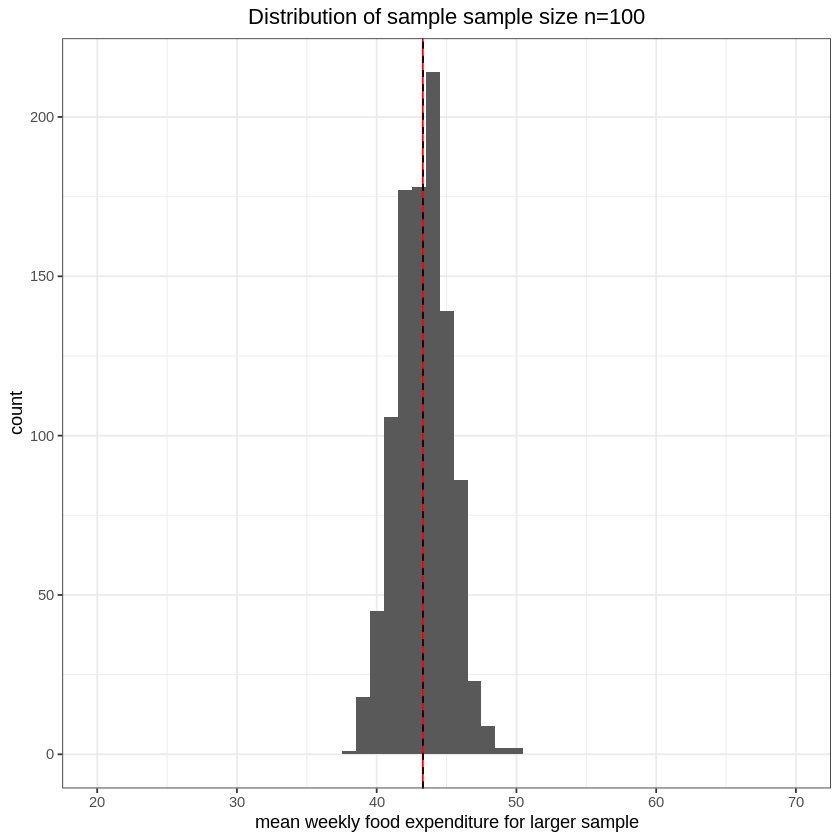

In [169]:
plot.sample(sampled.means,'Distribution of sample sample size n=100','larger sample')

### Stratified sample
**Task 7:** Sample n=100 families stratified on kid618 and compute the mean weekly food expenditure.  Repeat this M=1000 times. You will probably want to use some of your code from task 4.

In [170]:
sampled.means <- data.frame()
set.seed(333)
for (i in seq(M)) {
  # Draw a sample of families and compute mean food expenditure for 
  # that sample.
  sample.mean <- mean(stratified(data, "kid618", size=100)$foodexp)
  
  # Add the sample mean to the data frame of all sample means.
  sampled.means <- rbind(sampled.means, 
                         data.frame(sample=i, sample.mean=sample.mean))
}
# This function helps compute the two standard deviations of interest.
pop.and.sample.sd <- function(sampled.means) {
    # Compute the population standard deviation of the estimated means from
    # the true population mean.  You'll need to include this number in your
    # write-up.
    population.standard.deviation <- sqrt(sum((sampled.means$sample.mean - 
                                                 true.mean.foodexp)**2) / M)

    # Compute the sample standard deviation of the estimated means from
    # their average. You'll need to include this number in your write-up. 
    sample.standard.deviation <-
      sqrt(sum((sampled.means$sample.mean - 
                  mean(sampled.means$sample.mean))**2) / 
             (nrow(sampled.means) - 1))

    # Return the two standard deviations.
    return(c(population.standard.deviation, sample.standard.deviation))
}

In [171]:
# Print the two standard deviations (population s.d. and sample s.d.) to the console.
pop.and.sample.sd(sampled.means)

[1] 1.350021 1.079387

In [174]:
# Plot the distribution of samples.
plot.sample <- function(sampled.means, title, filename) {
    # Plot the distribution of sampled means along with the true population
    # mean as a red solid line and the empirical mean as a dashed line.
    p <- ggplot(sampled.means, aes(x=sample.mean)) + 
      geom_histogram(binwidth = 1) +
      xlim(20, 70) + xlab("mean weekly food expenditure for stratefied sample") + 
      ggtitle(title) +
      geom_vline(xintercept = true.mean.foodexp, color="red") +
      geom_vline(xintercept = mean(sampled.means$sample.mean), 
                 linetype="dashed") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5))

    # Save the resulting image.   Include this plot in your write-up.
    ggsave('strsample.jpg', width=7, height=3)
    
    return(p)
}

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

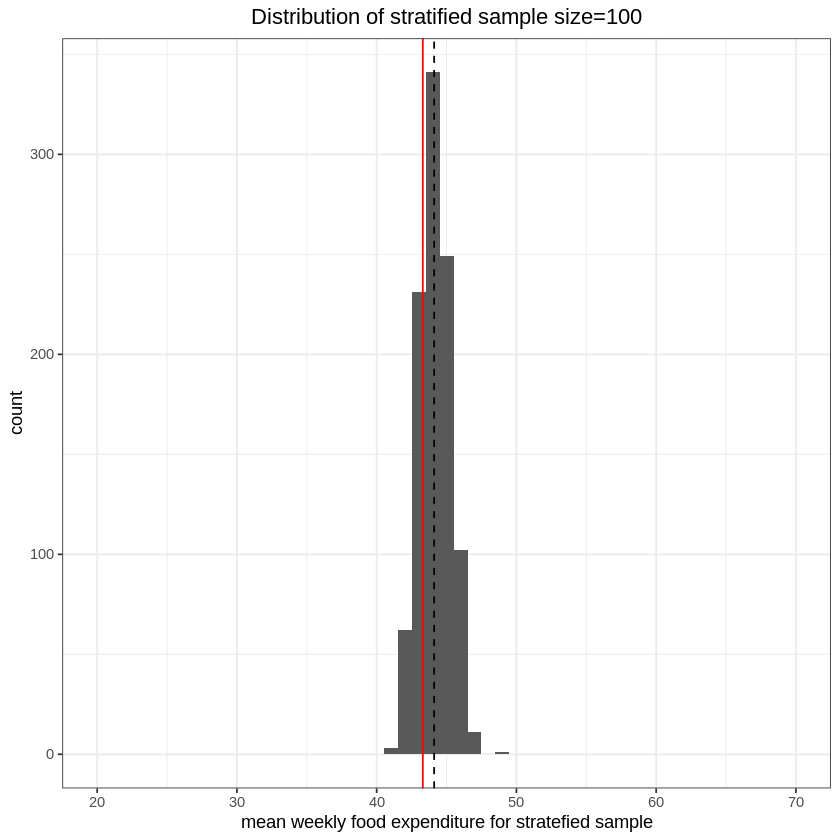

In [175]:
plot.sample(sampled.means,'Distribution of stratified sample size=100','strsample')